# [Ormir-mids](https://pypi.org/project/ormir-mids): dcm2mbids

By: Leonardo Barzaghi, [Donnie Cameron](https://github.com/DC-3T), Judith Cueto Fernandez, Jilmen Quintiens, [Francesco Santini](https://github.com/fsantini), 2022

Version 1.0  
Code licence: GPL v3  
Narrative licence: CC-BY

How to cite:

> S. Bonaretti, M. A. Espinosa Hernandez, F. Chiumento, Y. Founas, M. Froeling, J. Hirvasniemi, G. Iori, Y. Lee, S. Matuschik, M. Monzon, F. Santini, D. Cameron. ORMIR-MIDS: An open standard for curating and sharing musculoskeletal imaging data. 24th International Workshop on Quantitative Musculoskeletal Imaging (QMSKI). The Barossa Valley, South Australia. November 3-8, 2024.

---
---

## Aims

The [ormir-mids package](https://github.com/ormir-mids/ormir-mids/tree/Jupyter) converts traditional musculoskeletal data modalities in DICOM format into a structure compatible with [MIDS](https://bids.neuroimaging.io/)[<sup id="fn1-back">1</sup>](#fn1). It can be run as a standalone executable or called within Python scripts as a library.

In this notebook you will learn:

1. How to install `ormir-mids`; and

2. How to use `ormir-mids` as either an executable or as a Python module.

### Table of contents

[Installation](#Installation)  
[Usage examples](#Usage-examples)  
[Dependencies](#Dependencies)  
[References](#References)  
[Acknowledgements](#Acknowledgements)
    

---

In [33]:
# Additional requirements for running the notebook
!pip3 install directory_tree
!pip install ipywidgets
!pip install matplotlib
!pip install watermark
from directory_tree import DisplayTree

## Installation

To install the ormir-mids package, run the code below, noting the dependencies at the bottom of this document.

First, we clone the git repository:

In [25]:
!git clone https://github.com/ormir-mids/ormir-mids.git

Cloning into 'ormir-mids'...
remote: Enumerating objects: 1157, done.
remote: Counting objects: 100% (423/423), done.
remote: Compressing objects: 100% (212/212), done.
^Cceiving objects:   5% (58/1157)


Now we can install the package using `pip`. This will also install the required dependencies.

In [15]:
%cd ormir-mids
!pip install .
!pip install --upgrade nibabel # the default nibabel has bugs

/Users/msb/Documents/02_PROJECTS/2024-ormir-mids
Processing /Users/msb/Documents/02_PROJECTS/2024-ormir-mids
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ormir-mids: filename=ormir_mids-0.0.2-py3-none-any.whl size=36127 sha256=f04b7b44beb20b25aecf9092031570b17a913e881eb2746de6af95d74c4d8460
  Stored in directory: /Users/msb/Library/Caches/pip/wheels/1b/3a/bf/a7b5bc4255d4c7816172d5335d5efc285142bce092ac72ba44
Successfully built ormir-mids
  Attempting uninstall: ormir-mids
    Found existing installation: ormir-mids 0.0.2
    Uninstalling ormir-mids-0.0.2:
      Successfully uninstalled ormir-mids-0.0.2


The package is now ready to be used! Lets decompress the example files.

In [4]:
!unzip dicom.zip

/home/simoneponcioni/Documents/02_PROJECTS/2024-ormir-mids
Archive:  dicom.zip
   creating: dicom/
  inflating: dicom/Philips_MESE_T2.dcm  
   creating: dicom/GE_MEGRE_B0/
  inflating: dicom/GE_MEGRE_B0/IM0   
  inflating: dicom/GE_MEGRE_B0/IM1   
  inflating: dicom/GE_MEGRE_B0/IM10  
  inflating: dicom/GE_MEGRE_B0/IM100  
  inflating: dicom/GE_MEGRE_B0/IM101  
  inflating: dicom/GE_MEGRE_B0/IM102  
  inflating: dicom/GE_MEGRE_B0/IM103  
  inflating: dicom/GE_MEGRE_B0/IM104  
  inflating: dicom/GE_MEGRE_B0/IM105  
  inflating: dicom/GE_MEGRE_B0/IM106  
  inflating: dicom/GE_MEGRE_B0/IM107  
  inflating: dicom/GE_MEGRE_B0/IM108  
  inflating: dicom/GE_MEGRE_B0/IM109  
  inflating: dicom/GE_MEGRE_B0/IM11  
  inflating: dicom/GE_MEGRE_B0/IM110  
  inflating: dicom/GE_MEGRE_B0/IM111  
  inflating: dicom/GE_MEGRE_B0/IM112  
  inflating: dicom/GE_MEGRE_B0/IM113  
  inflating: dicom/GE_MEGRE_B0/IM114  
  inflating: dicom/GE_MEGRE_B0/IM115  
  inflating: dicom/GE_MEGRE_B0/IM116  
  inflating: 

Let's have a look at what data are available. We'll use the Python package `directory_tree`, which allows us to display our directory structure.

In [17]:
# DisplayTree('dicom')
DisplayTree(dirPath='dicom',
            stringRep=False,
            header=True,
            maxDepth=2,
            showHidden=False,
            sortBy=2, # 0 - Default, 1 - Files First, 2 - Directories First
            )


$ Operating System : Linux
$ Path : dicom

*************** Directory Tree ***************

dicom/
├── Philips_MESE_T2.dcm
└── GE_MEGRE_B0/
    ├── IM0
    ├── IM1
    ├── IM10
    ├── IM100
    ├── IM101
    ├── IM102
    ├── IM103
    ├── IM104
    ├── IM105
    ├── IM106
    ├── IM107
    ├── IM108
    ├── IM109
    ├── IM11
    ├── IM110
    ├── IM111
    ├── IM112
    ├── IM113
    ├── IM114
    ├── IM115
    ├── IM116
    ├── IM117
    ├── IM118
    ├── IM119
    ├── IM12
    ├── IM120
    ├── IM121
    ├── IM122
    ├── IM123
    ├── IM124
    ├── IM125
    ├── IM126
    ├── IM127
    ├── IM128
    ├── IM129
    ├── IM13
    ├── IM130
    ├── IM131
    ├── IM132
    ├── IM133
    ├── IM134
    ├── IM135
    ├── IM136
    ├── IM137
    ├── IM138
    ├── IM139
    ├── IM14
    ├── IM140
    ├── IM141
    ├── IM142
    ├── IM143
    ├── IM144
    ├── IM145
    ├── IM146
    ├── IM147
    ├── IM148
    ├── IM149
    ├── IM15
    ├── IM150
    ├── IM151
    ├── IM152
    ├── IM153
  

These are some multi-echo gradient-echo data from GE, and some multi-echo spin-echo data from Philips.
You can browse these files inside the dicom directory from the file explorer. You will notice that the GE data comprise multiple DICOM files, whereas Philips data are contained in a single, large file.

You are now ready to start using the ormir-mids package to standardise your data according to BIDS!

---

## Usage examples

We will now demonstrate the usage of `ormir-mids` via two use cases: 
    
1. Running `dcm2mbids` as an executable to convert DICOM data to the BIDS format.
2. Importing `ormir-mids` as a Python module to find, load, and interrogate BIDS-format data.
    


### 1. Usage: Run as executable

The Python package is set up in such a way that, after installing, you can use the code in your own code, and directly from the command line as well.

The commandline script is called `dcm2mbids.exe` and is by default stored in the same folder of your Python executable (and should be added to your system's PATH variable). 

Let's look at how we can call it.


In [18]:
!dcm2mbids -h

usage: dcm2mbids [-h] [--anonymize [pseudo_name]] [--recursive]
                 input_folder output_folder

Convert DICOM to BIDS format

positional arguments:
  input_folder          Input folder
  output_folder         Output folder

optional arguments:
  -h, --help            show this help message and exit
  --anonymize [pseudo_name], -a [pseudo_name]
                        Use the pseudo_name (default: anon) as patient name
  --recursive, -r       Recurse into subfolders


In principle, the program should be able to automatically figure out what the data are. Let's see what happens when we run `dcm2bids` recursively in our root folder:

In [19]:
# dcm2mbids -anonymize <pseudo_name> -recursive <input_dir> <output_dir>
!dcm2mbids -a mypatient -r dicom bids_output

----------------------------------------------- FFFFFFFFFFFFF --------------------------------
210
dicom/GE_MEGRE_B0
----------------------------------------------- FFFFFFFFFFFFF --------------------------------
256
Volume compatible with MESE_Philips_Magnitude
Volume saved
Volume compatible with MESE_Philips_Phase
Volume saved
Volume compatible with MESE_Philips_ReconstructedT2
Volume saved
Volume compatible with MEGRE_GE_Magnitude
Volume saved
Volume compatible with MEGRE_GE_Phase
Volume saved
Volume compatible with MEGRE_GE_Real
Volume saved
Volume compatible with MEGRE_GE_Imaginary
Volume saved


The output data are saved to a new directory called `bids_output`. Let's see what's inside:

In [21]:
DisplayTree(dirPath='bids_output',
            stringRep=False,
            header=True,
            maxDepth=2,
            showHidden=False,
            sortBy=2, # 0 - Default, 1 - Files First, 2 - Directories First
            )


$ Operating System : Linux
$ Path : bids_output

*************** Directory Tree ***************

bids_output/
├── mr-anat/
│   ├── mypatient_megre.json
│   ├── mypatient_megre.nii.gz
│   ├── mypatient_megre_extra.json
│   ├── mypatient_megre_imag.json
│   ├── mypatient_megre_imag.nii.gz
│   ├── mypatient_megre_imag_extra.json
│   ├── mypatient_megre_imag_patient.json
│   ├── mypatient_megre_patient.json
│   ├── mypatient_megre_ph.json
│   ├── mypatient_megre_ph.nii.gz
│   ├── mypatient_megre_ph_extra.json
│   ├── mypatient_megre_ph_patient.json
│   ├── mypatient_megre_real.json
│   ├── mypatient_megre_real.nii.gz
│   ├── mypatient_megre_real_extra.json
│   ├── mypatient_megre_real_patient.json
│   ├── mypatient_mese.json
│   ├── mypatient_mese.nii.gz
│   ├── mypatient_mese_extra.json
│   ├── mypatient_mese_patient.json
│   ├── mypatient_mese_ph.json
│   ├── mypatient_mese_ph.nii.gz
│   ├── mypatient_mese_ph_extra.json
│   └── mypatient_mese_ph_patient.json
└── mr-quant/
    ├── mypati

You can see that the converted data are sorted under `anat` for anatomical images and `quant` for quantitative maps. All the maps and MESE images were previously condensed in a single Enhanced DICOM file by the Philips scanner.

Every dataset has a nii.gz file containing the image data, and a set of json files containing the headers. Specifically:


*   The simple `.json` file contains useful information about the data
*   The `_patient.json` file contains private patient data. Delete this file if you want to anonymise your data!
*   The `_extra.json` file contains extra information that can be used to reconstruct the DICOM dataset from the BIDS data, so it can be stored again in PACS.



  ### 2. Usage: Import as python module

The ormir-mids package can also be used as an imported module within your Python scripts. Ideally, when you program an image processing tool, you will want to use this particular BIDS format for both input and output. You just need to point your Python script to the root folder of your patient information.

First, let's __import__ the required modules:

In [27]:
from ormir_mids.utils.io import find_bids, load_bids
import nibabel as nib

Now, let's - very simply - load some multi-echo spin-echo (MESE) data.

Let's see if we can __find__ the MESE MIDS data first: 

In [28]:
BIDS_FOLDER = 'bids_output'

mese_data_list = find_bids(BIDS_FOLDER, 'mese')

print(mese_data_list)

['bids_output/mr-anat/mypatient_mese.nii.gz']


Good news! There's at least one MIDS dataset with MESE data! Let's __load__ those data:

<OrthoSlicer3D: (176, 176, 6, 17)>

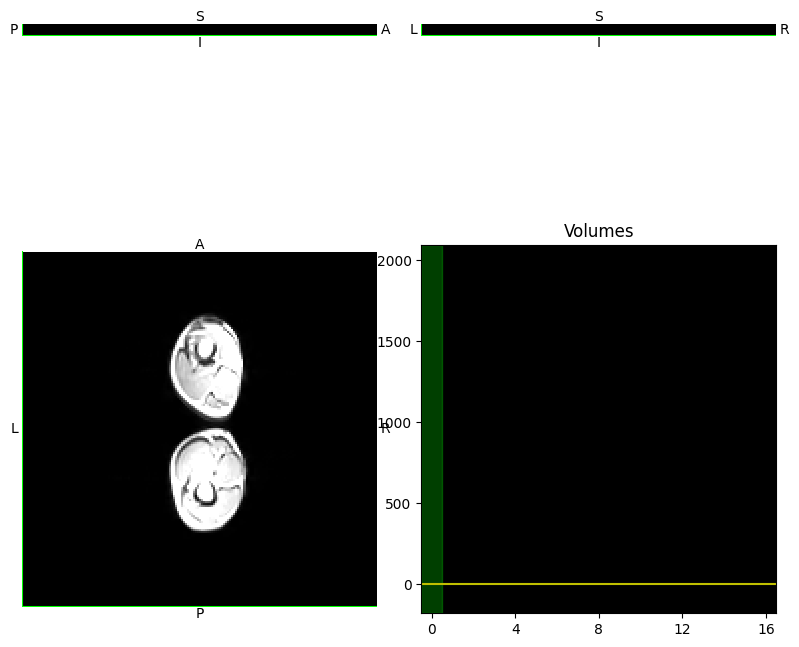

In [31]:
bids_mese = load_bids(mese_data_list[0])
nib.viewers.OrthoSlicer3D(bids_mese)

The BIDS file also has three dictionaries associated with it:

*   `bids_header`: containing relevant information
*   `patient_header`: containing privacy-relevant information (missing if anonymized)
*   `extra_header`: a dump of the other DICOM tags

Let's have a look, for example, at the MIDS header.


In [32]:
bids_mese.bids_header

{'EchoTime': [8.0,
  16.0,
  24.0,
  32.0,
  40.0,
  48.0,
  56.0,
  64.0,
  72.0,
  80.0,
  88.0,
  96.0,
  104.0,
  112.0,
  120.0,
  128.0,
  136.0],
 'FlipAngle': 90.0,
 'ScanningSequence': 'SE',
 'SequenceVariant': 'SK',
 'ScanOptions': 'OTHER',
 'MRAcquisitionType': '2D',
 'MTState': 'NONE',
 'PartialFourier': 'NO',
 'InversionTime': 0.0,
 'PixelBandwidth': 217.556838989257,
 'Manufacturer': 'Philips Medical Systems',
 'ImagingFrequency': 127.77088,
 'MagneticFieldStrength': 3.0,
 'PhaseEncodingDirection': 'i',
 'PulseSequenceType': 'Multi-echo Spin Echo',
 'FourthDimension': 'EchoTime',
 'RefocusingFlipAngle': 180.0}

You can now use the MIDS header information in tandem with your data (accessible from `bids_mese.volume`) to do any further processing, and you can later save the processed output in MIDS format, or as DICOM files.

In [34]:
import ormir_mids  # Import full package to avoid garbled watermark output

In [35]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2024-10-15T09:55:57.725618+02:00

Python implementation: CPython
Python version       : 3.9.20
IPython version      : 8.18.1

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-45-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit

directory_tree: 1.0.0
nibabel       : 5.3.0
ormir_mids    : 0.0.2



---
## References
[<sup id="fn1">1</sup>](#fn1-back) Gorgolewski, K., Auer, T., Calhoun, V. et al. The brain imaging data structure, a format for organizing and describing outputs of neuroimaging experiments. Sci Data 3, 160044 (2016). https://doi.org/10.1038/sdata.2016.44

---
## Acknowledgements
This package was developed with the support of the ORMIR community during the Jupyter Community Workshop and hackathon in Maastricht, The Netherlands, in June 2022.  

Image I/O is based on [DOSMA](https://github.com/ad12/DOSMA) by Arjun Desai. A stripped-down version of DOSMA is present in ormir-mids/dosma_io.  

Notebook created using the [ORMIR community](https://ormircommunity.github.io/) template (version 1.0, 2023).